#### Importing libraries

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


In [243]:
# Reading given dataset
df = pd.read_csv(r'Country-data.csv')

##### Analyse the given dataset

In [244]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [245]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

##### No null values in the given dataset

In [246]:
any(df.duplicated())

False

##### No duplicated observationfound in the given dataset

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


##### Only one object datatype column - 'country'. All other columns are numerical

In [248]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [249]:
df.shape

(167, 10)

In [250]:
#Numerical features are extracted for further analysis

numerical_features= [f for f in df.columns if df.dtypes[f]!='object']

In [251]:
numerical_features

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [252]:
#finding outliers in all numerical features
for col in numerical_features:
    q1,q3 =np.percentile(df[col],[25,75])
    IQR = q3-q1
    lowerbound = q1 -1.5*IQR
    upperbound = q3 +1.5*IQR
    outliers = df.loc[df[col]<lowerbound].shape[0] + df.loc[df[col]>upperbound].shape[0]
    outliers_ratio =round((outliers/len(df))*100,2)
    print("% of outliers in ",col,outliers_ratio)
    


% of outliers in  child_mort 2.4
% of outliers in  exports 2.99
% of outliers in  health 1.2
% of outliers in  imports 2.4
% of outliers in  income 4.79
% of outliers in  inflation 2.99
% of outliers in  life_expec 1.8
% of outliers in  total_fer 0.6
% of outliers in  gdpp 14.97


##### not much outliers present in the given dataset except gdpp column and income. As aim of this assignment is to find 
##### poor country which has low value in most of  the features and also dataset has only 160 observations, 
##### removing outliers is not taken place. 

##### Data visualization and find the relationships between features

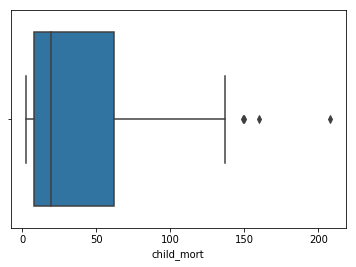

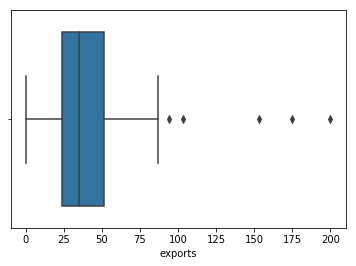

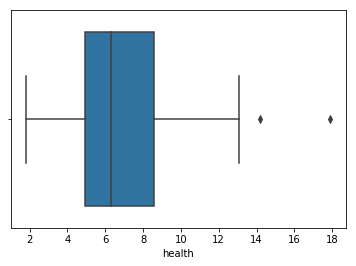

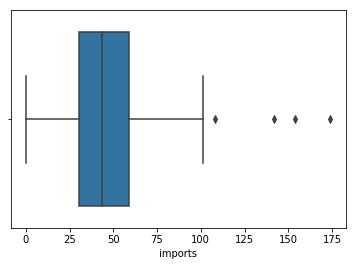

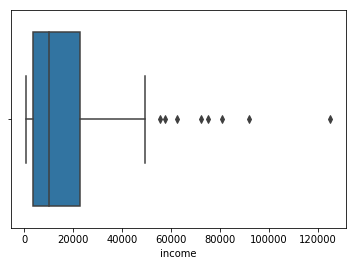

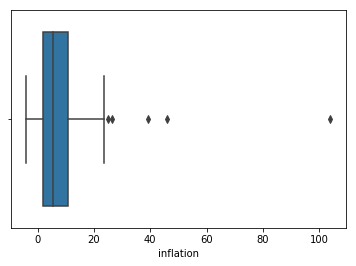

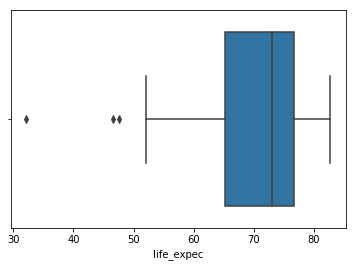

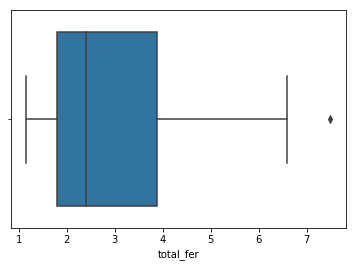

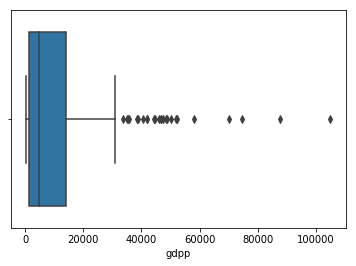

In [253]:
def plottingBoxPlot(col):
    sns.boxplot(x=df[col],data=df)
    plt.xlabel(col)
    
    plt.show()
for col in numerical_features:
    plottingBoxPlot(col)

In [254]:
df.shape

(167, 10)

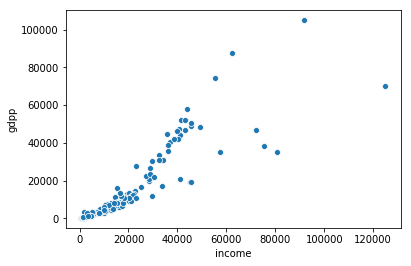

In [255]:
sns.scatterplot(x=df['income'],y=df['gdpp'])

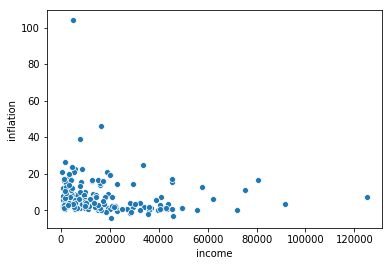

In [256]:
sns.scatterplot(x=df['income'],y=df['inflation'])

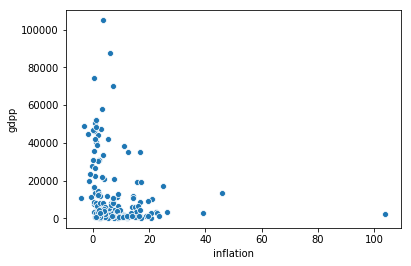

In [257]:
sns.scatterplot(x=df['inflation'],y=df['gdpp'])

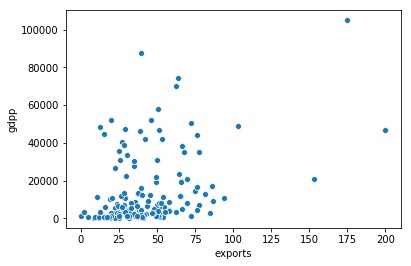

In [258]:
sns.scatterplot(x=df['exports'],y=df['gdpp'])

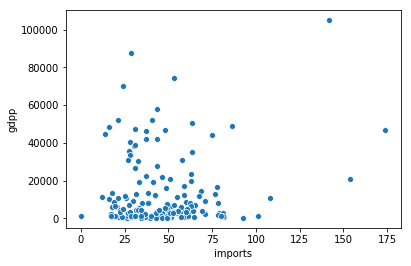

In [259]:
sns.scatterplot(x=df['imports'],y=df['gdpp'])

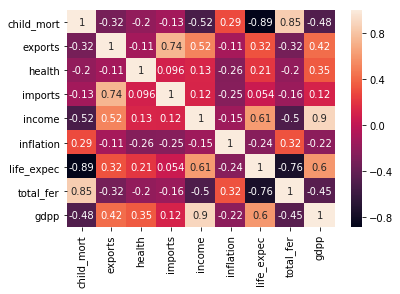

In [260]:
df.corr()
sns.heatmap(df.corr(),annot=True)

##### Imports and exports has high correlation. child_mort and total_fer has high correlation.
##### income and gdp has high correlation.

##### Scaling the numerical features for fitting into model

In [261]:
scaler = StandardScaler()

In [262]:
df[numerical_features] =scaler.fit_transform(df[numerical_features])

In [263]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [264]:
df_numerical = df.drop('country',axis=1)

In [265]:
df_original_exc_country = df_numerical.copy()

##### PCA computaion

In [266]:
pca = PCA(svd_solver='randomized', random_state=42)

In [267]:
pca.fit(df_numerical)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [268]:
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [269]:
#checking PCs are perpendicular each other
print(round(np.dot(pca.components_[0],pca.components_[1])))
print(round(np.dot(pca.components_[0],pca.components_[2])))
print(round(np.dot(pca.components_[0],pca.components_[3])))
print(round(np.dot(pca.components_[0],pca.components_[4])))
print(round(np.dot(pca.components_[0],pca.components_[5])))
print(round(np.dot(pca.components_[0],pca.components_[6])))
print(round(np.dot(pca.components_[0],pca.components_[7])))
print(round(np.dot(pca.components_[0],pca.components_[8])))

0.0
0.0
-0.0
0.0
-0.0
-0.0
-0.0
0.0


##### Principle components are perpenticular

In [270]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

In [271]:
pca.explained_variance_ratio_.round(2)

array([0.46, 0.17, 0.13, 0.11, 0.07, 0.02, 0.01, 0.01, 0.01])

##### 1st PC expllained 46% of variance, 2nd PC expllained 17% of variance,3rd PC expllained 13% of variance,
##### 4th PC expllained 11% of variance, 5th PC expllained 7% of variance

##### applying PCA components into the orginal socio economic features

In [272]:
df_pca=pca.fit_transform(df_numerical)


In [273]:
df_pca = pd.DataFrame(df_pca,columns=['child_mort', 'exports', 'health', 'imports', 'income',
                                           'inflation', 'life_expec', 'total_fer', 'gdpp']).round(2)
df_pca

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-2.91,0.10,-0.72,1.01,-0.16,-0.25,0.38,0.42,-0.01
1,0.43,-0.59,-0.33,-1.16,0.17,0.08,0.25,-0.22,0.17
2,-0.29,-0.46,1.22,-0.87,0.16,-0.40,-0.09,-0.18,0.08
3,-2.93,1.70,1.53,0.84,-0.27,-0.55,-0.44,-0.36,-0.09
4,1.03,0.14,-0.23,-0.85,-0.19,-0.21,0.24,-0.02,0.09
5,0.02,-1.78,0.87,-0.04,0.98,-0.00,-0.15,0.13,0.13
6,-0.10,-0.57,0.24,-1.47,-0.06,0.28,0.55,-0.17,-0.07
7,2.34,-1.99,0.19,1.11,-0.73,-0.16,0.38,-0.27,-0.35
8,2.97,-0.73,-0.52,1.21,0.08,0.10,-0.05,-0.16,-0.10
9,-0.18,-0.40,0.87,-0.44,0.14,0.64,-0.96,-0.06,-0.04


In [274]:
df_pca.shape

(167, 9)

In [275]:
#100* np.var(df_pca)/sum(np.var(df_pca))

In [276]:
sum(np.var(df_numerical))

9.000000000000002

In [277]:
sum(np.var(df_pca))

8.996764028828567

##### Variance before appling PCA and afterr applying PCA both are almost same. PCA doesnt change the total variance of the dataset. It only rearranges them in the direction of maximum variance

In [278]:
#Displaying all PC's for all 9 numerical features
colnames = list(df_original_exc_country.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                       'PC4':pca.components_[3],'PC5':pca.components_[4],'PC6':pca.components_[5],
                       'PC7':pca.components_[6],'PC8':pca.components_[7],'PC9':pca.components_[8],'Feature':colnames})
pcs_df
#colnames

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Feature
0,-0.419519,0.192884,-0.029544,0.370653,-0.168970,0.200628,-0.079489,-0.682743,0.327542,child_mort
1,0.283897,0.613163,0.144761,0.003091,0.057616,-0.059333,-0.707303,-0.014197,-0.123082,exports
2,0.150838,-0.243087,-0.596632,0.461897,0.518000,0.007276,-0.249831,0.072497,0.113088,health
3,0.161482,0.671821,-0.299927,-0.071907,0.255376,-0.030032,0.592190,-0.028946,0.099037,imports
4,0.398441,0.022536,0.301548,0.392159,-0.247150,0.160347,0.095562,0.352624,0.612982,income
5,-0.193173,-0.008404,0.642520,0.150442,0.714869,0.066285,0.104633,-0.011538,-0.025236,inflation
6,0.425839,-0.222707,0.113919,-0.203797,0.108220,-0.601127,0.018486,-0.504664,0.294040,life_expec
7,-0.403729,0.155233,0.019549,0.378304,-0.135262,-0.750689,0.028826,0.293353,-0.026336,total_fer
8,0.392645,-0.046022,0.122977,0.531995,-0.180167,0.016779,0.242998,-0.249696,-0.625646,gdpp


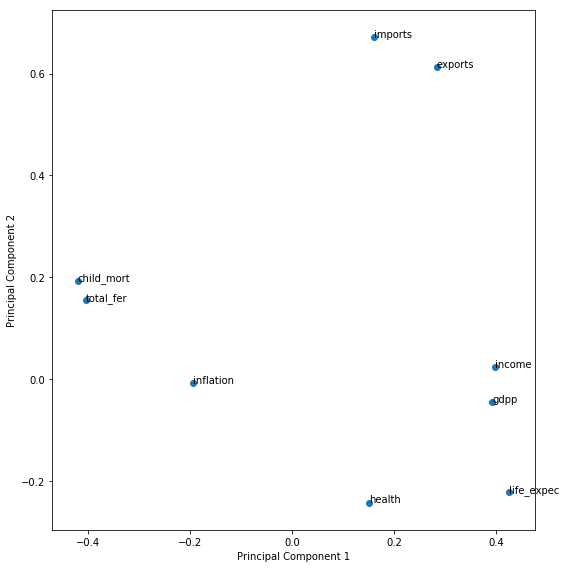

In [279]:
#plotting each features for PC1 and PC2
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

##### PC1 is in the direction of life_expec,gdpp,income features are heavy


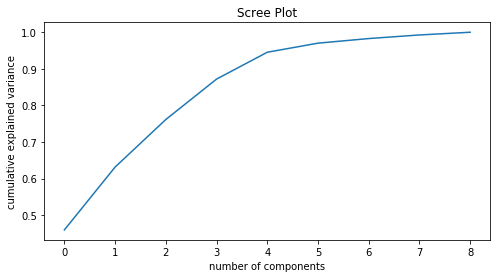

In [280]:
#Making the screeplot - plotting the cumulative variance against the number of components

fig = plt.figure(figsize = (8,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Scree Plot')
plt.show()

##### Cumulative sum upto PC4 explains 92% of the data and upto PC5 explains 95% of the data

In [281]:
pca_incremental = IncrementalPCA(5)

In [282]:
##### Incremental PC is fitted into the original data set
df_pca=pca_incremental.fit_transform(df_numerical)

In [283]:
df_pca.shape

(167, 5)

In [284]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_pca.transpose())

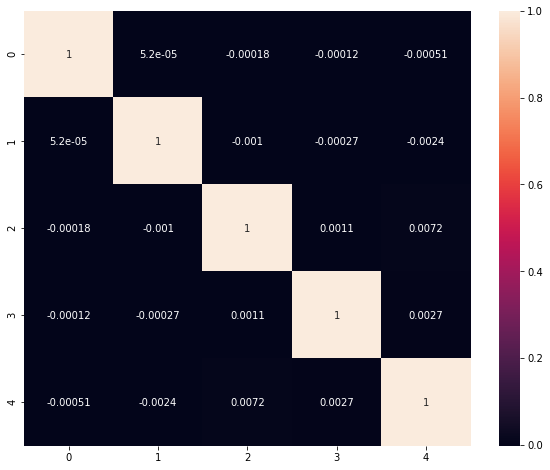

In [285]:
#plotting the correlation matrix
#%matplotlib inline
plt.figure(figsize = (10,8))
sns.heatmap(corrmat,annot = True)

In [286]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)


max corr: 0.0071945430604898495 , min corr:  -0.0023747044974955843


##### Correlations are very close to 0

In [287]:
df_pca.shape

(167, 5)

In [288]:
df_pca=df_pca.transpose()

In [289]:
df_pca.shape

(5, 167)

In [290]:
#colnames = list(df_original_exc_country.columns)
pcs_df = pd.DataFrame({'PC1':df_pca[0],'PC2':df_pca[1],'PC3':df_pca[2],
                       'PC4':df_pca[3],'PC5':df_pca[4]})
pcs_df

,PC1,PC2,PC3,PC4,PC5
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227
3,-2.932714,1.698771,1.525076,0.855595,-0.214778
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186
5,0.022890,-1.772736,0.864500,-0.036747,0.997895
6,-0.101463,-0.567318,0.248107,-1.466023,-0.085832
7,2.342153,-1.989710,0.198795,1.113413,-0.710654
8,2.973841,-0.735152,-0.528284,1.201101,0.080167
9,-0.181303,-0.396895,0.868399,-0.435201,0.120357


###### hopkins statistics  shows the given data's  cluster tendency

In [291]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [292]:
hopkins(pcs_df)

0.8316751482449929

##### Data has high tendency to cluster

In [293]:
#Silhouette score to find the K value i.e no of clusters
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(pcs_df)
    sse_.append([k, silhouette_score(pcs_df, kmeans.labels_)])

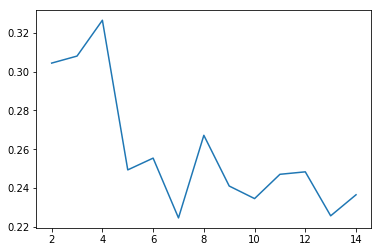

In [294]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

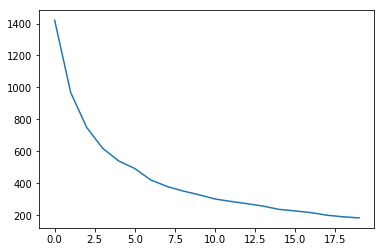

In [295]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(pcs_df)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

##### As per silhoutte and SSD graphs, K = 4 or 5 is to be considered.

#### KMeans with cluster 5

In [296]:
# Kmeans with K=5
model_clus5 = KMeans(n_clusters = 5, max_iter=100,random_state =42)
model_clus5.fit(pcs_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [297]:
df_cluster5 = df.copy()

In [298]:
#Concatenating clusters with PC's
df_km1 = pd.concat([pcs_df, pd.Series(model_clus5.labels_)], axis=1)
df_km1.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5',  'ClusterID']
df_km1

,PC1,PC2,PC3,PC4,PC5,ClusterID
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765,1
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205,4
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227,0
3,-2.932714,1.698771,1.525076,0.855595,-0.214778,1
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186,4
5,0.022890,-1.772736,0.864500,-0.036747,0.997895,0
6,-0.101463,-0.567318,0.248107,-1.466023,-0.085832,0
7,2.342153,-1.989710,0.198795,1.113413,-0.710654,3
8,2.973841,-0.735152,-0.528284,1.201101,0.080167,3
9,-0.181303,-0.396895,0.868399,-0.435201,0.120357,0


In [299]:
country =list(df.country)

In [300]:
#merging country with the clusterid
df_km1 = pd.concat([pd.Series(country), df_km1], axis=1)
df_km1.columns = ['country','PC1', 'PC2', 'PC3', 'PC4', 'PC5',  'ClusterID']
df_km1

,country,PC1,PC2,PC3,PC4,PC5,ClusterID
0,Afghanistan,-2.913000,0.091969,-0.721242,1.001838,-0.146765,1
1,Albania,0.429870,-0.589373,-0.328611,-1.165014,0.153205,4
2,Algeria,-0.285289,-0.452139,1.232051,-0.857767,0.191227,0
3,Angola,-2.932714,1.698771,1.525076,0.855595,-0.214778,1
4,Antigua and Barbuda,1.033371,0.133853,-0.216699,-0.846638,-0.193186,4
5,Argentina,0.022890,-1.772736,0.864500,-0.036747,0.997895,0
6,Armenia,-0.101463,-0.567318,0.248107,-1.466023,-0.085832,0
7,Australia,2.342153,-1.989710,0.198795,1.113413,-0.710654,3
8,Austria,2.973841,-0.735152,-0.528284,1.201101,0.080167,3
9,Azerbaijan,-0.181303,-0.396895,0.868399,-0.435201,0.120357,0


C:\Users\VJT\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:181: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. '


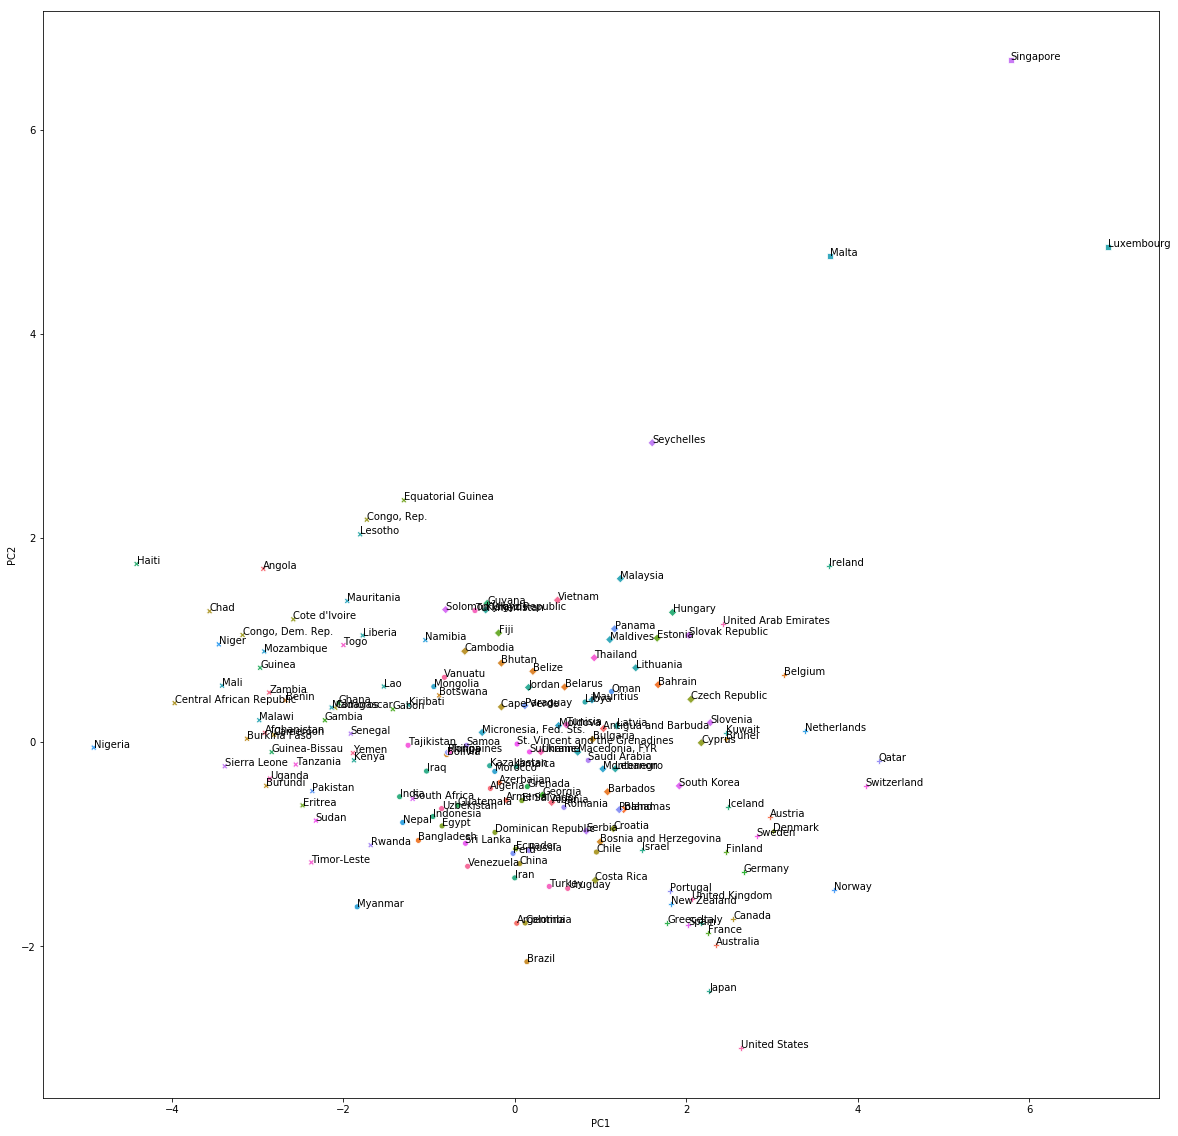

In [301]:
#Visualize the clusters with PC1 and PC2 for all countries
%matplotlib inline
fig = plt.figure(figsize = (20,20))

sns.scatterplot(x="PC1", y="PC2",style="ClusterID",hue='country',data=df_km1)
#plt.scatter(df_km.child_mort, df_km.exports,hue=df_km.ClusterID)
plt.xlabel('PC1')
plt.ylabel('PC2')
for i, txt in enumerate(df_km1.country):
    plt.annotate(txt, (df_km1.PC1[i],df_km1.PC2[i]))
plt.tight_layout()
plt.legend().set_visible(False)
plt.show()

In [302]:
df_km1=df_km1.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)

In [303]:
# merging socio economic features with clusters
df_km1=df_km1.merge(df,on='country')

In [304]:
df_km1

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,Albania,4,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,Algeria,0,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,Angola,1,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,Antigua and Barbuda,4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
5,Argentina,0,-0.591177,-0.812628,0.468966,-1.279787,0.080920,1.244725,0.591474,-0.382933,-0.145791
6,Armenia,0,-0.501643,-0.743107,-0.882089,-0.065883,-0.543421,-0.001123,0.309514,-0.833471,-0.533233
7,Australia,3,-0.832423,-0.779697,0.699011,-1.076779,1.261966,-0.628316,1.290735,-0.674457,2.130699
8,Austria,3,-0.844858,0.372890,1.527901,0.037693,1.355617,-0.655549,1.121559,-0.999109,1.857082
9,Azerbaijan,0,0.023128,0.482661,-0.341667,-1.085065,-0.059556,0.571037,-0.164178,-0.681083,-0.389857


In [305]:
#Creating mean for all features for further analysis


km1_clusters_child_mort = pd.DataFrame(df_km1.groupby(["ClusterID"]).child_mort.mean())
km1_clusters_exports = pd.DataFrame(df_km1.groupby(["ClusterID"]).exports.mean())
km1_clusters_health =pd.DataFrame(df_km1.groupby(["ClusterID"]).health.mean())
km1_clusters_imports = pd.DataFrame(df_km1.groupby(["ClusterID"]).imports.mean())

km1_clusters_income =pd.DataFrame(df_km1.groupby(["ClusterID"]).income.mean())
km1_clusters_inflation = pd.DataFrame(df_km1.groupby(["ClusterID"]).inflation.mean())
km1_clusters_life_expec = pd.DataFrame(df_km1.groupby(["ClusterID"]).life_expec.mean())
km1_clusters_total_fer =pd.DataFrame(df_km1.groupby(["ClusterID"]).total_fer.mean())
km1_clusters_gdpp = pd.DataFrame(df_km1.groupby(["ClusterID"]).gdpp.mean())

##### Visualize feature variables for all custers

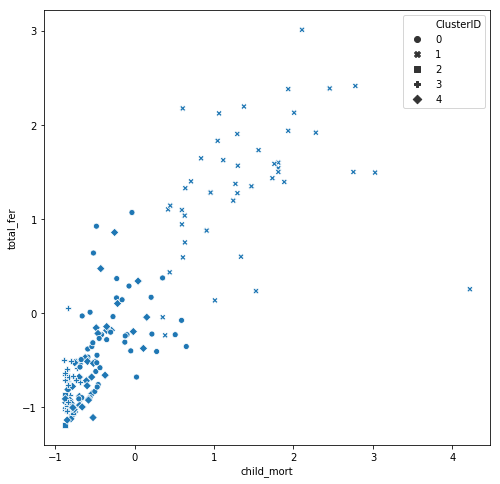

In [306]:
#Visualize feature variables for all custers
%matplotlib inline
fig = plt.figure(figsize = (8,8))

sns.scatterplot(x="child_mort", y="total_fer",style="ClusterID",data=df_km1)

plt.xlabel('child_mort')
plt.ylabel('total_fer')

plt.show()

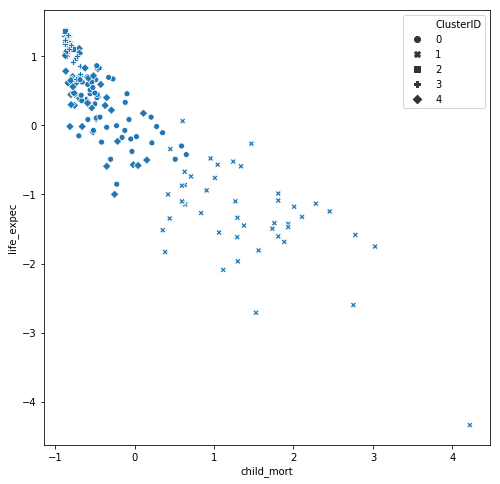

In [307]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))

sns.scatterplot(x="child_mort", y="life_expec",style="ClusterID",data=df_km1)

plt.xlabel('child_mort')
plt.ylabel('life_expec')

plt.show()

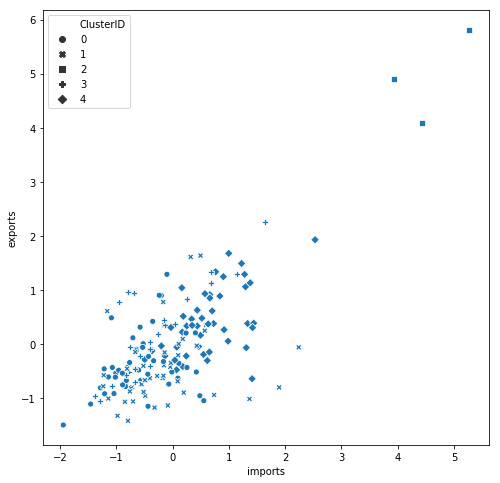

In [308]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))

sns.scatterplot(x="imports", y="exports",style="ClusterID",data=df_km1)

plt.xlabel('imports')
plt.ylabel('exports')

plt.show()

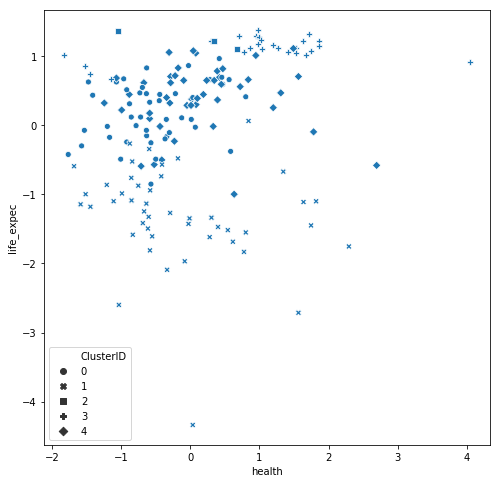

In [309]:

%matplotlib inline
fig = plt.figure(figsize = (8,8))

sns.scatterplot(x="health", y="life_expec",style="ClusterID",data=df_km1)

plt.xlabel('health')
plt.ylabel('life_expec')

plt.show()

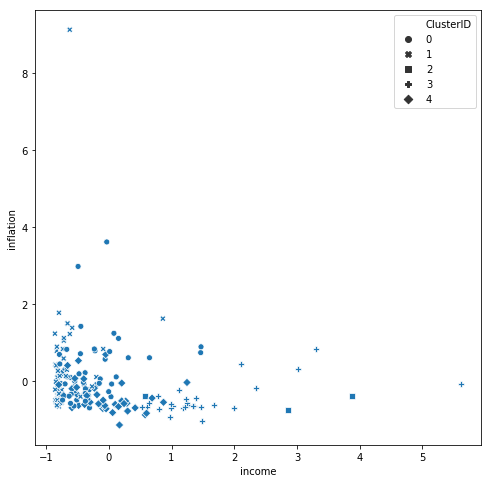

In [310]:

%matplotlib inline
fig = plt.figure(figsize = (8,8))

sns.scatterplot(x="income", y="inflation",style="ClusterID",data=df_km1)

plt.xlabel('income')
plt.ylabel('inflation')

plt.show()

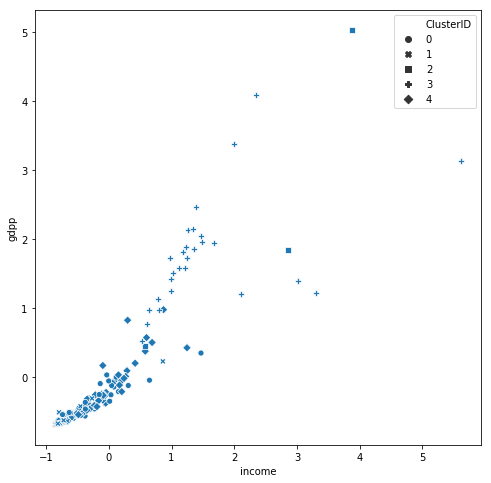

In [311]:

%matplotlib inline
fig = plt.figure(figsize = (8,8))

sns.scatterplot(x="income", y="gdpp",style="ClusterID",data=df_km1)

plt.xlabel('income')
plt.ylabel('gdpp')

plt.show()

In [312]:
#showing coutries in clusterID 1
df_km1.loc[df_km1.ClusterID ==1]

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
3,Angola,1,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
17,Benin,1,1.808842,-0.633337,-0.991634,-0.401467,-0.797319,-0.654410,-0.987502,1.598107,-0.667961
21,Botswana,1,0.353908,0.091147,0.541996,0.182698,-0.200033,0.107996,-1.517586,-0.045030,-0.361949
25,Burkina Faso,1,1.933196,-0.801651,-0.027638,-0.716337,-0.817611,-0.092213,-1.427359,1.936010,-0.677976
26,Burundi,1,1.376093,-1.177797,1.746991,-0.318607,-0.852261,0.428709,-1.449916,2.194407,-0.696801
28,Cameroon,1,1.734230,-0.691881,-0.615529,-0.824055,-0.753616,-0.557152,-1.495030,1.432468,-0.637754
31,Central African Republic,1,2.753928,-1.072418,-1.035452,-0.844770,-0.845810,-0.547664,-2.600313,1.498724,-0.685035
32,Chad,1,2.778798,-0.157666,-0.834619,-0.140457,-0.791596,-0.132065,-1.585257,2.413050,-0.660355
36,Comoros,1,1.241791,-0.900444,-0.841922,0.199270,-0.818651,-0.371177,-0.525087,1.193948,-0.667359


In [313]:
#showing coutries in clusterID 2
df_km1.loc[df_km1.ClusterID ==2]

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2,-0.882164,4.899083,0.348467,3.940415,3.878996,-0.394898,1.211786,-0.873224,5.036507
98,Malta,2,-0.782681,4.094101,0.669799,4.437577,0.580393,-0.374972,1.099002,-1.052114,0.445220
133,Singapore,2,-0.882164,5.813835,-1.042755,5.266181,2.859238,-0.742749,1.369684,-1.191250,1.840665


In [314]:
#showing coutries in clusterID 3
df_km1.loc[df_km1.ClusterID ==3]

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
7,Australia,3,-0.832423,-0.779697,0.699011,-1.076779,1.261966,-0.628316,1.290735,-0.674457,2.130699
8,Austria,3,-0.844858,0.372890,1.527901,0.037693,1.355617,-0.655549,1.121559,-0.999109,1.857082
15,Belgium,3,-0.839884,1.291301,1.418356,1.152164,1.246357,-0.559999,1.065167,-0.720836,1.720274
23,Brunei,3,-0.690660,0.961991,-1.451722,-0.782625,3.301480,0.846206,0.738094,-0.734087,1.222291
29,Canada,3,-0.812526,-0.439409,1.637446,-0.658334,1.225546,-0.466062,1.211786,-0.873224,1.884444
44,Denmark,3,-0.849832,0.343618,1.673961,-0.136314,1.397240,-0.432852,1.008775,-0.714211,2.464511
53,Finland,3,-0.877190,-0.088145,0.779344,-0.393181,1.178720,-0.705079,1.065167,-0.714211,1.818776
54,France,3,-0.847345,-0.523567,1.856536,-0.778482,1.027838,-0.638754,1.223065,-0.608202,1.512325
58,Germany,3,-0.847345,0.043580,1.746991,-0.405610,1.209937,-0.666461,1.076446,-1.032237,1.577993
60,Greece,3,-0.854806,-0.695540,1.272296,-0.670763,0.601205,-0.674526,1.110281,-0.972607,0.762616


In [315]:
#showing coutries in clusterID 4
df_km1.loc[df_km1.ClusterID ==4]

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
1,Albania,4,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
4,Antigua and Barbuda,4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
10,Bahamas,4,-0.608587,-0.223528,0.392285,-0.132171,0.299440,-0.775674,0.365906,-0.720836,0.822811
11,Bahrain,4,-0.737914,1.038830,-0.673953,0.166126,1.246357,-0.032435,0.614031,-0.522070,0.423331
13,Barbados,4,-0.598639,-0.058873,0.421497,0.074980,-0.095976,-0.707926,0.692980,-0.773841,0.166131
14,Belarus,4,-0.815013,0.376549,-0.440257,0.729576,-0.049151,0.694389,-0.017559,-0.965982,-0.379460
16,Belize,4,-0.484233,0.625362,-0.589969,0.439565,-0.482027,-0.630214,0.095225,-0.157664,-0.471942
18,Bhutan,4,0.110176,0.050898,-0.589969,0.986444,-0.557989,-0.170019,0.174174,-0.376308,-0.590145
20,Bosnia and Herzegovina,4,-0.780194,-0.417455,1.564416,0.182698,-0.386295,-0.605544,0.704258,-1.085242,-0.457167
24,Bulgaria,4,-0.683199,0.332641,0.019832,0.253129,-0.095976,-0.633061,0.377185,-0.912977,-0.335134


In [316]:
#showing coutries in clusterID 0
df_km1.loc[df_km1.ClusterID ==0]

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
2,Algeria,0,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
5,Argentina,0,-0.591177,-0.812628,0.468966,-1.279787,0.080920,1.244725,0.591474,-0.382933,-0.145791
6,Armenia,0,-0.501643,-0.743107,-0.882089,-0.065883,-0.543421,-0.001123,0.309514,-0.833471,-0.533233
9,Azerbaijan,0,0.023128,0.482661,-0.341667,-1.085065,-0.059556,0.571037,-0.164178,-0.681083,-0.389857
12,Bangladesh,0,0.276809,-0.918739,-1.203420,-1.039492,-0.765062,-0.060901,-0.017559,-0.409435,-0.667961
19,Bolivia,0,0.207171,0.003331,-0.721423,-0.521615,-0.610537,0.094712,0.117782,0.166988,-0.601089
22,Brazil,0,-0.459363,-1.112667,0.801253,-1.453794,-0.137599,0.059604,0.411020,-0.760590,-0.096540
33,Chile,0,-0.735427,-0.124735,0.417845,-0.645905,0.117340,0.111791,0.963662,-0.707585,-0.003511
34,China,0,-0.561332,-0.541862,-0.637438,-1.006348,-0.396180,-0.079878,0.456134,-0.899726,-0.459903
35,Colombia,0,-0.489208,-0.922398,0.282740,-1.205213,-0.324901,-0.372125,0.659145,-0.621453,-0.367421


In [317]:
#combining clusters with mean values of all socio economic features
df_cluster5 = pd.concat([pd.Series([0,1,2,3,4]), km1_clusters_child_mort, km1_clusters_exports, km1_clusters_health,
               km1_clusters_imports,km1_clusters_income,km1_clusters_inflation,km1_clusters_life_expec,
               km1_clusters_total_fer,km1_clusters_gdpp], axis=1)
df_cluster5.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean",
             'imports_mean','income_mean','inflation_mean','life_expec_mean','total_fer_mean','gdpp_mean']
df_cluster5.head()

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,-0.282339,-0.370710,-0.520834,-0.542177,-0.251992,0.291854,0.186204,-0.252925,-0.380596
1,1,1.390528,-0.445685,-0.172031,-0.181797,-0.696799,0.392663,-1.301826,1.371398,-0.607309
2,2,-0.849003,4.935673,-0.008163,4.548058,2.439542,-0.504206,1.226824,-1.038863,2.440797
3,3,-0.824962,0.136817,0.929461,-0.369090,1.544653,-0.463978,1.114458,-0.735069,1.770741
4,4,-0.574741,0.406140,0.136521,0.632216,-0.122432,-0.372955,0.385521,-0.624766,-0.218899


##### Visualize all 9 features for analysing the factors to find which cluster has poor countries

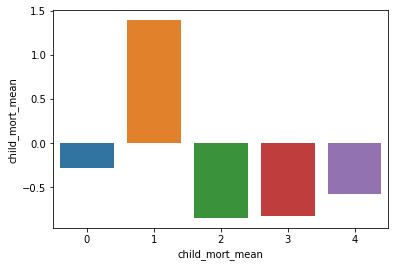

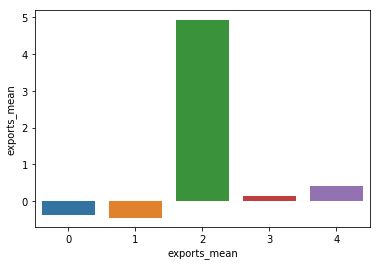

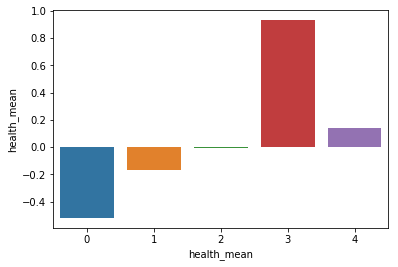

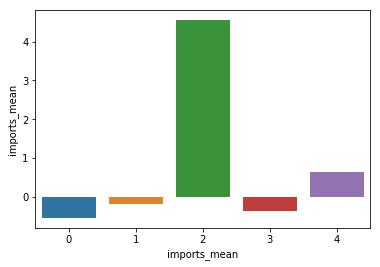

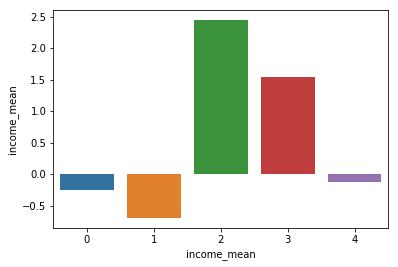

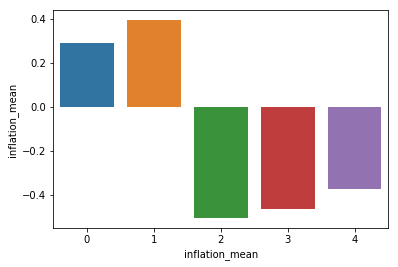

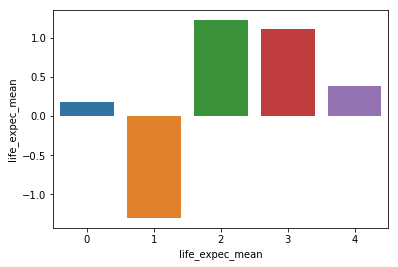

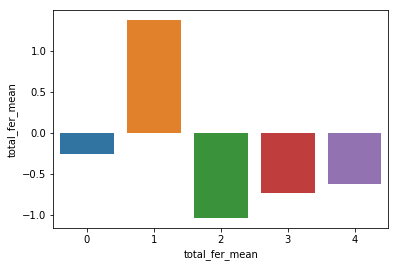

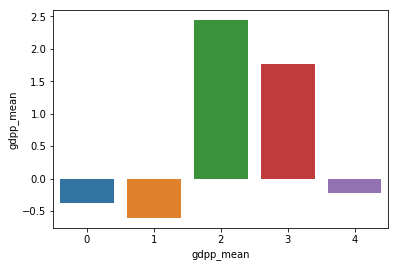

In [318]:

cols=['child_mort_mean','exports_mean','health_mean','imports_mean','income_mean','inflation_mean',
      'life_expec_mean','total_fer_mean','gdpp_mean']
for col in cols:
    sns.barplot(x=df_cluster5.ClusterID,y=df_cluster5[col])
    plt.xlabel(col)
    plt.show()

##### Cluster 1 contains under developed countries more. 
##### Mean of GDPP, income, life_expec,exports are very low in cluster1
##### Mean Inflation, health, child_mort are very high in cluster1

In [319]:
df_km1[df_km1.ClusterID==1]

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
3,Angola,1,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
17,Benin,1,1.808842,-0.633337,-0.991634,-0.401467,-0.797319,-0.654410,-0.987502,1.598107,-0.667961
21,Botswana,1,0.353908,0.091147,0.541996,0.182698,-0.200033,0.107996,-1.517586,-0.045030,-0.361949
25,Burkina Faso,1,1.933196,-0.801651,-0.027638,-0.716337,-0.817611,-0.092213,-1.427359,1.936010,-0.677976
26,Burundi,1,1.376093,-1.177797,1.746991,-0.318607,-0.852261,0.428709,-1.449916,2.194407,-0.696801
28,Cameroon,1,1.734230,-0.691881,-0.615529,-0.824055,-0.753616,-0.557152,-1.495030,1.432468,-0.637754
31,Central African Republic,1,2.753928,-1.072418,-1.035452,-0.844770,-0.845810,-0.547664,-2.600313,1.498724,-0.685035
32,Chad,1,2.778798,-0.157666,-0.834619,-0.140457,-0.791596,-0.132065,-1.585257,2.413050,-0.660355
36,Comoros,1,1.241791,-0.900444,-0.841922,0.199270,-0.818651,-0.371177,-0.525087,1.193948,-0.667359


##### Getting country name of cluster1 to find which are the countries are under developed countries in cluster1

In [320]:

df_cluster5_1=df_km1[df_km1.ClusterID==1]

###### The parameters used for clustering have totally opposing characteristics, meaning, few of them has to be higher
###### and few of them should be lower to predict 5 least under developed countries. Thus in order to make the
###### objective to be single, the parameters that are to be lower is reciprocated to be higher by subtracting with the 
###### maximum value of that particular parameter.

In [321]:

df_cluster5_1['Factorssum']=(df_cluster5_1.child_mort)  +(df_cluster5_1.inflation)+(df_cluster5_1.total_fer)+(df_cluster5_1.exports.max()-df_cluster5_1.exports)+(df_cluster5_1.health.max() -df_cluster5_1.health)+(df_cluster5_1.imports.max()-df_cluster5_1.imports)+(df_cluster5_1.income.max()-df_cluster5_1.income)+(df_cluster5_1.life_expec.max()-df_cluster5_1.life_expec)+(df_cluster5_1.gdpp.max()-df_cluster5_1.gdpp)


C:\Users\VJT\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [322]:
#showing the countries sorted by factorssum in descening order to get least 5 under developed countries
df_cluster5_1.sort_values(by=['Factorssum'],ascending=False).head(5)

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Factorssum
113,Nigeria,1,2.281385,-0.578452,-0.637438,-1.221785,-0.624065,9.129718,-1.134121,1.916133,-0.581936,25.425838
31,Central African Republic,1,2.753928,-1.072418,-1.035452,-0.844770,-0.845810,-0.547664,-2.600313,1.498724,-0.685035,18.109590
66,Haiti,1,4.221297,-0.944352,0.034438,0.737863,-0.813969,-0.221257,-4.337186,0.253120,-0.673215,17.570387
32,Chad,1,2.778798,-0.157666,-0.834619,-0.140457,-0.791596,-0.132065,-1.585257,2.413050,-0.660355,16.550539
97,Mali,1,2.455480,-0.669927,-0.670302,-0.488471,-0.794718,-0.323734,-1.246905,2.386548,-0.670697,16.380118


#### KMeans with 4 clusters

In [323]:
# Kmeans with K=4
model_clus4 = KMeans(n_clusters = 4, max_iter=100, random_state=42)
model_clus4.fit(pcs_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [324]:
df_cluster4 = df.copy()

In [325]:
#Concatnate clusterid with principle components
df_km2 = pd.concat([pcs_df, pd.Series(model_clus4.labels_)], axis=1)
df_km2.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5',  'ClusterID']
df_km2

,PC1,PC2,PC3,PC4,PC5,ClusterID
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765,1
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205,3
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227,3
3,-2.932714,1.698771,1.525076,0.855595,-0.214778,1
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186,3
5,0.022890,-1.772736,0.864500,-0.036747,0.997895,3
6,-0.101463,-0.567318,0.248107,-1.466023,-0.085832,3
7,2.342153,-1.989710,0.198795,1.113413,-0.710654,2
8,2.973841,-0.735152,-0.528284,1.201101,0.080167,2
9,-0.181303,-0.396895,0.868399,-0.435201,0.120357,3


In [326]:
#concatenate countries with clusterid
country =list(df.country)

df_km2 = pd.concat([pd.Series(country), df_km2], axis=1)
df_km2.columns = ['country','PC1', 'PC2', 'PC3', 'PC4', 'PC5',  'ClusterID']
df_km2

,country,PC1,PC2,PC3,PC4,PC5,ClusterID
0,Afghanistan,-2.913000,0.091969,-0.721242,1.001838,-0.146765,1
1,Albania,0.429870,-0.589373,-0.328611,-1.165014,0.153205,3
2,Algeria,-0.285289,-0.452139,1.232051,-0.857767,0.191227,3
3,Angola,-2.932714,1.698771,1.525076,0.855595,-0.214778,1
4,Antigua and Barbuda,1.033371,0.133853,-0.216699,-0.846638,-0.193186,3
5,Argentina,0.022890,-1.772736,0.864500,-0.036747,0.997895,3
6,Armenia,-0.101463,-0.567318,0.248107,-1.466023,-0.085832,3
7,Australia,2.342153,-1.989710,0.198795,1.113413,-0.710654,2
8,Austria,2.973841,-0.735152,-0.528284,1.201101,0.080167,2
9,Azerbaijan,-0.181303,-0.396895,0.868399,-0.435201,0.120357,3


C:\Users\VJT\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:181: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. '


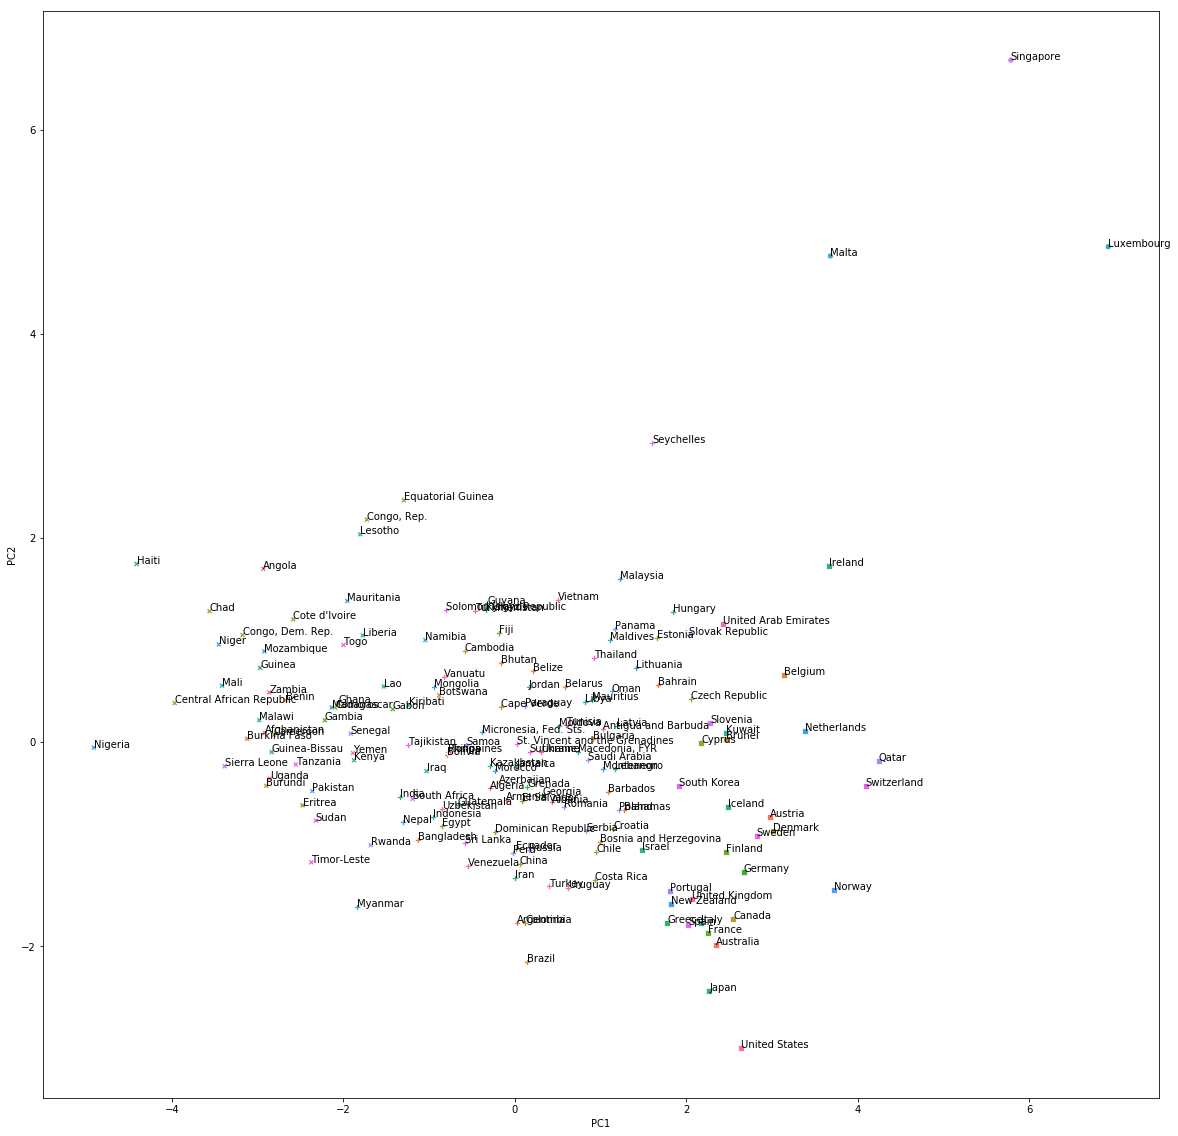

In [327]:
#plotting principle component with all counteries for each cluster
%matplotlib inline
fig = plt.figure(figsize = (20,20))

sns.scatterplot(x="PC1", y="PC2",style="ClusterID",hue='country',data=df_km2)

plt.xlabel('PC1')
plt.ylabel('PC2')
for i, txt in enumerate(df_km2.country):
    plt.annotate(txt, (df_km2.PC1[i],df_km2.PC2[i]))
plt.tight_layout()
plt.legend().set_visible(False)
plt.show()

In [328]:
#dropping PC and merging socio economic features
df_km2=df_km2.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)

df_km2=df_km2.merge(df,on='country')

df_km2

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,Albania,3,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,Algeria,3,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,Angola,1,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,Antigua and Barbuda,3,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
5,Argentina,3,-0.591177,-0.812628,0.468966,-1.279787,0.080920,1.244725,0.591474,-0.382933,-0.145791
6,Armenia,3,-0.501643,-0.743107,-0.882089,-0.065883,-0.543421,-0.001123,0.309514,-0.833471,-0.533233
7,Australia,2,-0.832423,-0.779697,0.699011,-1.076779,1.261966,-0.628316,1.290735,-0.674457,2.130699
8,Austria,2,-0.844858,0.372890,1.527901,0.037693,1.355617,-0.655549,1.121559,-0.999109,1.857082
9,Azerbaijan,3,0.023128,0.482661,-0.341667,-1.085065,-0.059556,0.571037,-0.164178,-0.681083,-0.389857


In [329]:
#Finding mean value for all features to analyse the each cluster which has under developed countries more
km2_clusters_child_mort = pd.DataFrame(df_km2.groupby(["ClusterID"]).child_mort.mean())
km2_clusters_exports = pd.DataFrame(df_km2.groupby(["ClusterID"]).exports.mean())
km2_clusters_health =pd.DataFrame(df_km2.groupby(["ClusterID"]).health.mean())
km2_clusters_imports = pd.DataFrame(df_km2.groupby(["ClusterID"]).imports.mean())

km2_clusters_income =pd.DataFrame(df_km2.groupby(["ClusterID"]).income.mean())
km2_clusters_inflation = pd.DataFrame(df_km2.groupby(["ClusterID"]).inflation.mean())
km2_clusters_life_expec = pd.DataFrame(df_km2.groupby(["ClusterID"]).life_expec.mean())
km2_clusters_total_fer =pd.DataFrame(df_km2.groupby(["ClusterID"]).total_fer.mean())
km2_clusters_gdpp = pd.DataFrame(df_km2.groupby(["ClusterID"]).gdpp.mean())

In [330]:
df_km2.loc[df_km2.ClusterID ==1]


,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
3,Angola,1,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
17,Benin,1,1.808842,-0.633337,-0.991634,-0.401467,-0.797319,-0.654410,-0.987502,1.598107,-0.667961
21,Botswana,1,0.353908,0.091147,0.541996,0.182698,-0.200033,0.107996,-1.517586,-0.045030,-0.361949
25,Burkina Faso,1,1.933196,-0.801651,-0.027638,-0.716337,-0.817611,-0.092213,-1.427359,1.936010,-0.677976
26,Burundi,1,1.376093,-1.177797,1.746991,-0.318607,-0.852261,0.428709,-1.449916,2.194407,-0.696801
28,Cameroon,1,1.734230,-0.691881,-0.615529,-0.824055,-0.753616,-0.557152,-1.495030,1.432468,-0.637754
31,Central African Republic,1,2.753928,-1.072418,-1.035452,-0.844770,-0.845810,-0.547664,-2.600313,1.498724,-0.685035
32,Chad,1,2.778798,-0.157666,-0.834619,-0.140457,-0.791596,-0.132065,-1.585257,2.413050,-0.660355
36,Comoros,1,1.241791,-0.900444,-0.841922,0.199270,-0.818651,-0.371177,-0.525087,1.193948,-0.667359


In [331]:
df_km2.loc[df_km2.ClusterID ==2]

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
7,Australia,2,-0.832423,-0.779697,0.699011,-1.076779,1.261966,-0.628316,1.290735,-0.674457,2.130699
8,Austria,2,-0.844858,0.372890,1.527901,0.037693,1.355617,-0.655549,1.121559,-0.999109,1.857082
15,Belgium,2,-0.839884,1.291301,1.418356,1.152164,1.246357,-0.559999,1.065167,-0.720836,1.720274
23,Brunei,2,-0.690660,0.961991,-1.451722,-0.782625,3.301480,0.846206,0.738094,-0.734087,1.222291
29,Canada,2,-0.812526,-0.439409,1.637446,-0.658334,1.225546,-0.466062,1.211786,-0.873224,1.884444
42,Cyprus,2,-0.862268,0.332641,-0.308803,0.439565,0.871752,-0.547664,1.053889,-1.012361,0.976037
44,Denmark,2,-0.849832,0.343618,1.673961,-0.136314,1.397240,-0.432852,1.008775,-0.714211,2.464511
53,Finland,2,-0.877190,-0.088145,0.779344,-0.393181,1.178720,-0.705079,1.065167,-0.714211,1.818776
54,France,2,-0.847345,-0.523567,1.856536,-0.778482,1.027838,-0.638754,1.223065,-0.608202,1.512325
58,Germany,2,-0.847345,0.043580,1.746991,-0.405610,1.209937,-0.666461,1.076446,-1.032237,1.577993


In [332]:
df_km2.loc[df_km2.ClusterID ==3]

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
1,Albania,3,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,Algeria,3,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
4,Antigua and Barbuda,3,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
5,Argentina,3,-0.591177,-0.812628,0.468966,-1.279787,0.080920,1.244725,0.591474,-0.382933,-0.145791
6,Armenia,3,-0.501643,-0.743107,-0.882089,-0.065883,-0.543421,-0.001123,0.309514,-0.833471,-0.533233
9,Azerbaijan,3,0.023128,0.482661,-0.341667,-1.085065,-0.059556,0.571037,-0.164178,-0.681083,-0.389857
10,Bahamas,3,-0.608587,-0.223528,0.392285,-0.132171,0.299440,-0.775674,0.365906,-0.720836,0.822811
11,Bahrain,3,-0.737914,1.038830,-0.673953,0.166126,1.246357,-0.032435,0.614031,-0.522070,0.423331
12,Bangladesh,3,0.276809,-0.918739,-1.203420,-1.039492,-0.765062,-0.060901,-0.017559,-0.409435,-0.667961
13,Barbados,3,-0.598639,-0.058873,0.421497,0.074980,-0.095976,-0.707926,0.692980,-0.773841,0.166131


In [333]:
df_km2.loc[df_km2.ClusterID ==0]

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,0,-0.882164,4.899083,0.348467,3.940415,3.878996,-0.394898,1.211786,-0.873224,5.036507
98,Malta,0,-0.782681,4.094101,0.669799,4.437577,0.580393,-0.374972,1.099002,-1.052114,0.445220
133,Singapore,0,-0.882164,5.813835,-1.042755,5.266181,2.859238,-0.742749,1.369684,-1.191250,1.840665


In [334]:
#concatenate features mean value with corresponding clusters 
df_cluster4 = pd.concat([pd.Series([0,1,2,3]), km2_clusters_child_mort, km2_clusters_exports, km2_clusters_health,
               km2_clusters_imports,km2_clusters_income,km2_clusters_inflation,km2_clusters_life_expec,
               km2_clusters_total_fer,km2_clusters_gdpp], axis=1)
df_cluster4.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean",
             'imports_mean','income_mean','inflation_mean','life_expec_mean','total_fer_mean','gdpp_mean']
df_cluster4.head()

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,-0.849003,4.935673,-0.008163,4.548058,2.439542,-0.504206,1.226824,-1.038863,2.440797
1,1,1.360218,-0.437533,-0.155984,-0.189204,-0.686894,0.402111,-1.282180,1.364944,-0.604242
2,2,-0.828609,0.172621,0.859190,-0.296373,1.462275,-0.478189,1.107649,-0.763681,1.661902
3,3,-0.419827,0.006648,-0.211724,0.047581,-0.217274,-0.034953,0.268420,-0.438222,-0.330805


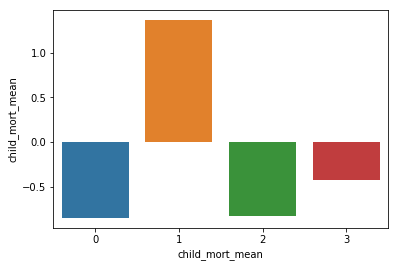

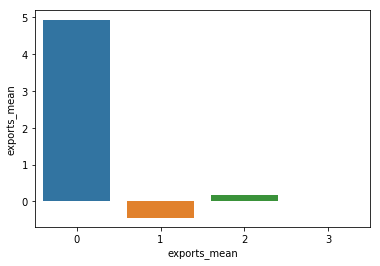

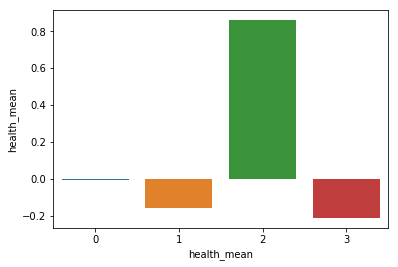

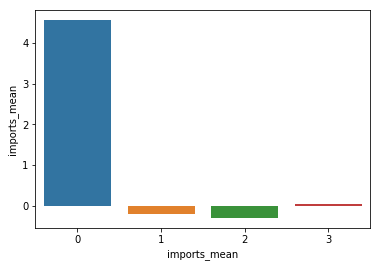

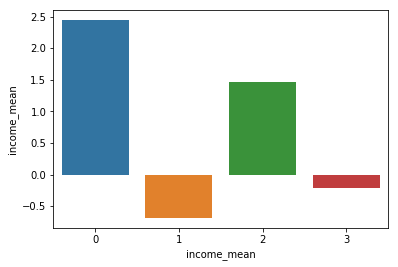

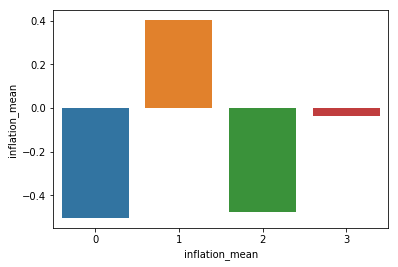

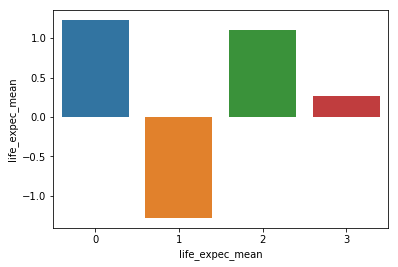

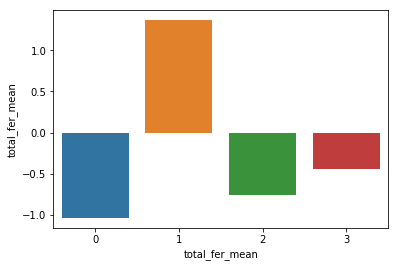

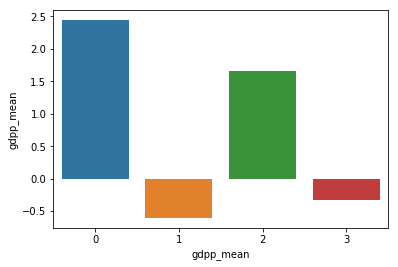

In [335]:
#plotting bar plot to find which cluster has features indicates under develped countries more
cols=['child_mort_mean','exports_mean','health_mean','imports_mean','income_mean','inflation_mean',
      'life_expec_mean','total_fer_mean','gdpp_mean']
for col in cols:
    sns.barplot(x=df_cluster4.ClusterID,y=df_cluster4[col])
    plt.xlabel(col)
    plt.show()



##### cluster 1 has under developed countries more
##### mean of GDP, income, life_expec are very low in cluster1
##### mean of child_mort,infation are high in cluster 1

In [336]:

df_cluster1=df_km2[df_km2.ClusterID==1]



###### The parameters used for clustering have totally opposing characteristics, meaning, few of them has to be higher
###### and few of them should be lower to predict 5 least under developed countries. Thus in order to make the
###### objective to be single, the parameters that are to be lower is reciprocated to be higher by subtracting with the 
###### maximum value of that particular parameter.

In [337]:
df_cluster1['FactorSum']=(df_cluster1.child_mort)  +(df_cluster1.inflation)+(df_cluster1.total_fer)+(df_cluster1.exports.max()-df_cluster1.exports)+(df_cluster1.health.max() -df_cluster1.health)+(df_cluster1.imports.max()-df_cluster1.imports)+(df_cluster1.income.max()-df_cluster1.income)+(df_cluster1.life_expec.max()-df_cluster1.life_expec)+(df_cluster1.gdpp.max()-df_cluster1.gdpp)


C:\Users\VJT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [338]:
#Sorting the countries based on factorsum in desending order and get first 5 records
df_cluster1.sort_values(by='FactorSum',ascending =False).head()

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,FactorSum
113,Nigeria,1,2.281385,-0.578452,-0.637438,-1.221785,-0.624065,9.129718,-1.134121,1.916133,-0.581936,25.425838
31,Central African Republic,1,2.753928,-1.072418,-1.035452,-0.844770,-0.845810,-0.547664,-2.600313,1.498724,-0.685035,18.109590
66,Haiti,1,4.221297,-0.944352,0.034438,0.737863,-0.813969,-0.221257,-4.337186,0.253120,-0.673215,17.570387
32,Chad,1,2.778798,-0.157666,-0.834619,-0.140457,-0.791596,-0.132065,-1.585257,2.413050,-0.660355,16.550539
97,Mali,1,2.455480,-0.669927,-0.670302,-0.488471,-0.794718,-0.323734,-1.246905,2.386548,-0.670697,16.380118


### Hierarchical Clustering

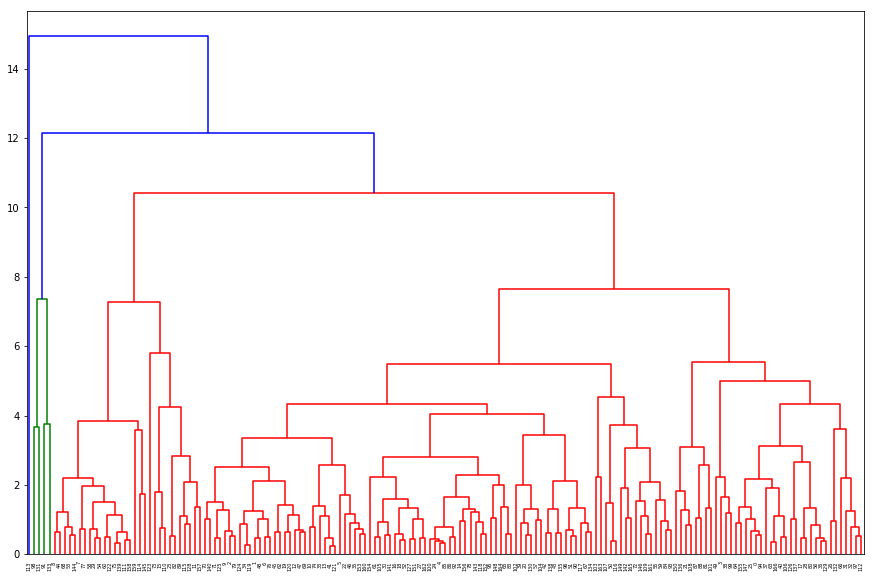

In [339]:
#Hierarchical clustering with 'complete' linkage type is created
figure=plt.figure(figsize=(15,10))
mergings = linkage(pcs_df, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [340]:
#Cutting dendrogram with 4 clusters
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))


In [341]:
#combining PCs with clusters
df_hc = pd.concat([pcs_df, clusterCut], axis=1)
df_hc.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5',  'ClusterID']
df_hc

,PC1,PC2,PC3,PC4,PC5,ClusterID
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765,0
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205,0
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227,0
3,-2.932714,1.698771,1.525076,0.855595,-0.214778,0
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186,0
5,0.022890,-1.772736,0.864500,-0.036747,0.997895,0
6,-0.101463,-0.567318,0.248107,-1.466023,-0.085832,0
7,2.342153,-1.989710,0.198795,1.113413,-0.710654,1
8,2.973841,-0.735152,-0.528284,1.201101,0.080167,1
9,-0.181303,-0.396895,0.868399,-0.435201,0.120357,0


In [342]:
#combining countries with PCs and cluster id
country =list(df.country)

df_hc = pd.concat([pd.Series(country), df_hc], axis=1)
df_hc.columns = ['country','PC1', 'PC2', 'PC3', 'PC4', 'PC5',  'ClusterID']
df_hc

,country,PC1,PC2,PC3,PC4,PC5,ClusterID
0,Afghanistan,-2.913000,0.091969,-0.721242,1.001838,-0.146765,0
1,Albania,0.429870,-0.589373,-0.328611,-1.165014,0.153205,0
2,Algeria,-0.285289,-0.452139,1.232051,-0.857767,0.191227,0
3,Angola,-2.932714,1.698771,1.525076,0.855595,-0.214778,0
4,Antigua and Barbuda,1.033371,0.133853,-0.216699,-0.846638,-0.193186,0
5,Argentina,0.022890,-1.772736,0.864500,-0.036747,0.997895,0
6,Armenia,-0.101463,-0.567318,0.248107,-1.466023,-0.085832,0
7,Australia,2.342153,-1.989710,0.198795,1.113413,-0.710654,1
8,Austria,2.973841,-0.735152,-0.528284,1.201101,0.080167,1
9,Azerbaijan,-0.181303,-0.396895,0.868399,-0.435201,0.120357,0


C:\Users\VJT\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:181: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. '


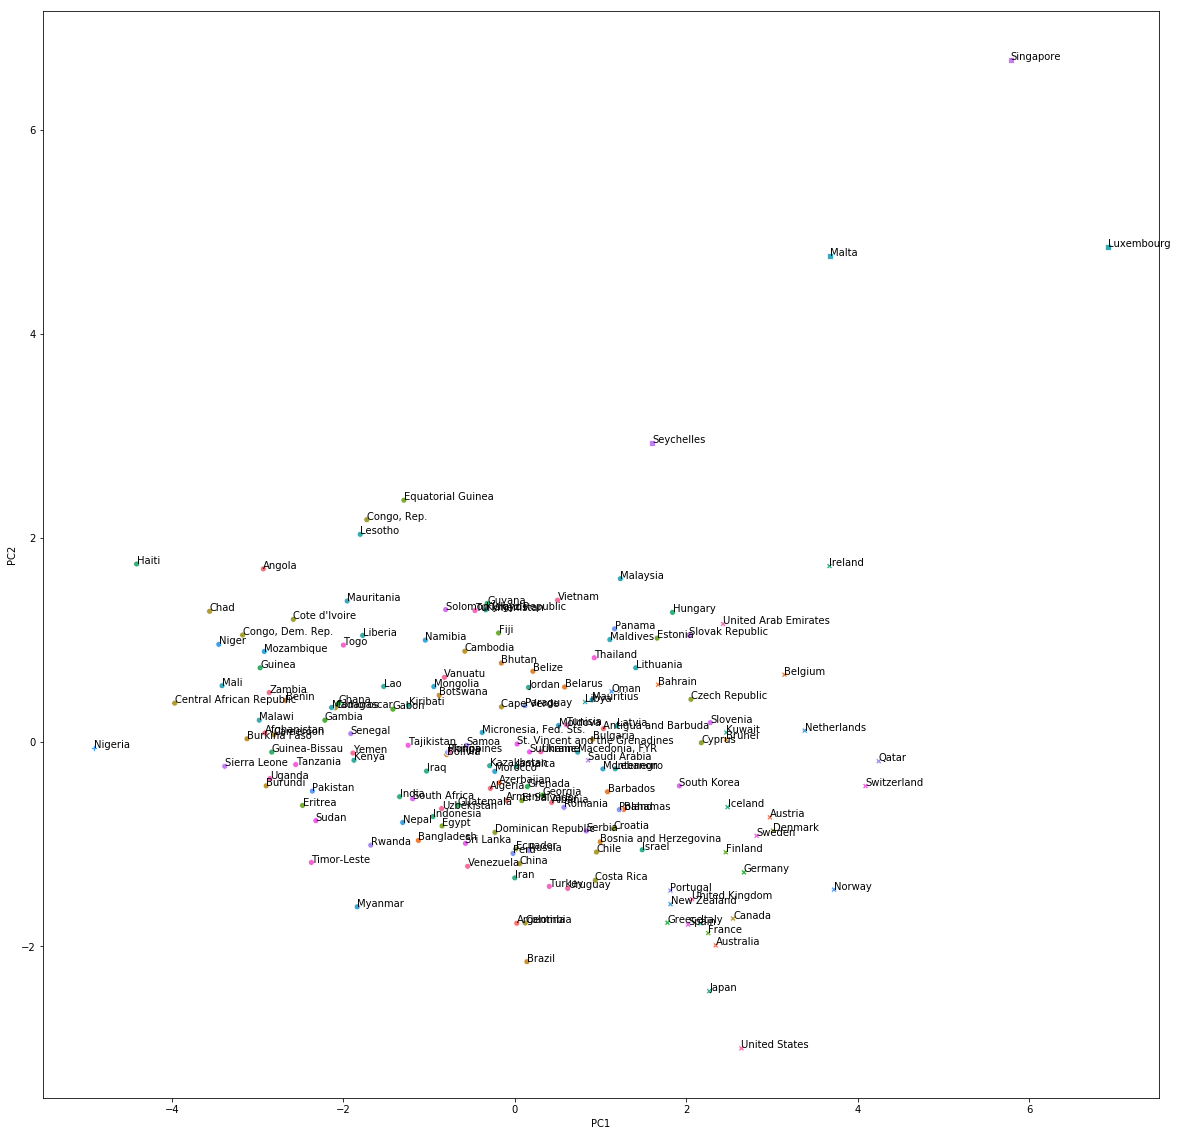

In [343]:
#plotting PC1 and PC2 with countries
%matplotlib inline
fig = plt.figure(figsize = (20,20))

sns.scatterplot(x="PC1", y="PC2",style="ClusterID",hue='country',data=df_hc)

plt.xlabel('PC1')
plt.ylabel('PC2')
for i, txt in enumerate(df_hc.country):
    plt.annotate(txt, (df_hc.PC1[i],df_hc.PC2[i]))
plt.tight_layout()
plt.legend().set_visible(False)
plt.show()

In [344]:
#dropping PCs and merging socio economic features 
df_hc=df_hc.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)

df_hc=df_hc.merge(df,on='country')

df_hc

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,Albania,0,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,Algeria,0,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,Angola,0,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,Antigua and Barbuda,0,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
5,Argentina,0,-0.591177,-0.812628,0.468966,-1.279787,0.080920,1.244725,0.591474,-0.382933,-0.145791
6,Armenia,0,-0.501643,-0.743107,-0.882089,-0.065883,-0.543421,-0.001123,0.309514,-0.833471,-0.533233
7,Australia,1,-0.832423,-0.779697,0.699011,-1.076779,1.261966,-0.628316,1.290735,-0.674457,2.130699
8,Austria,1,-0.844858,0.372890,1.527901,0.037693,1.355617,-0.655549,1.121559,-0.999109,1.857082
9,Azerbaijan,0,0.023128,0.482661,-0.341667,-1.085065,-0.059556,0.571037,-0.164178,-0.681083,-0.389857


In [345]:
#finding mean of all features for analysing the clusters further

hc_clusters_child_mort = pd.DataFrame(df_hc.groupby(["ClusterID"]).child_mort.mean())
hc_clusters_exports = pd.DataFrame(df_hc.groupby(["ClusterID"]).exports.mean())
hc_clusters_health =pd.DataFrame(df_hc.groupby(["ClusterID"]).health.mean())
hc_clusters_imports = pd.DataFrame(df_hc.groupby(["ClusterID"]).imports.mean())

hc_clusters_income =pd.DataFrame(df_hc.groupby(["ClusterID"]).income.mean())
hc_clusters_inflation = pd.DataFrame(df_hc.groupby(["ClusterID"]).inflation.mean())
hc_clusters_life_expec = pd.DataFrame(df_hc.groupby(["ClusterID"]).life_expec.mean())
hc_clusters_total_fer =pd.DataFrame(df_hc.groupby(["ClusterID"]).total_fer.mean())
hc_clusters_gdpp = pd.DataFrame(df_hc.groupby(["ClusterID"]).gdpp.mean())

##### Visualaizing the clusters with socio economic features

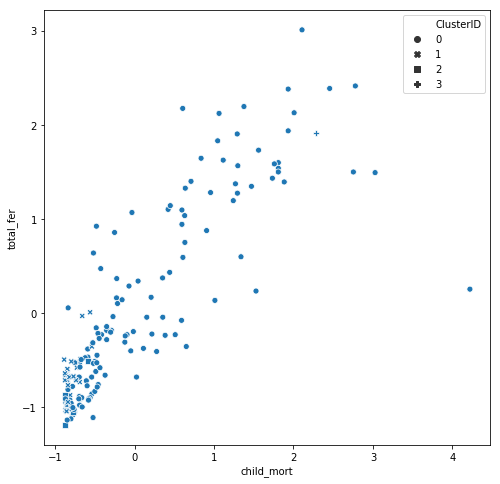

In [346]:

%matplotlib inline
fig = plt.figure(figsize = (8,8))

sns.scatterplot(x="child_mort", y="total_fer",style="ClusterID",data=df_hc)

plt.xlabel('child_mort')
plt.ylabel('total_fer')
plt.show()

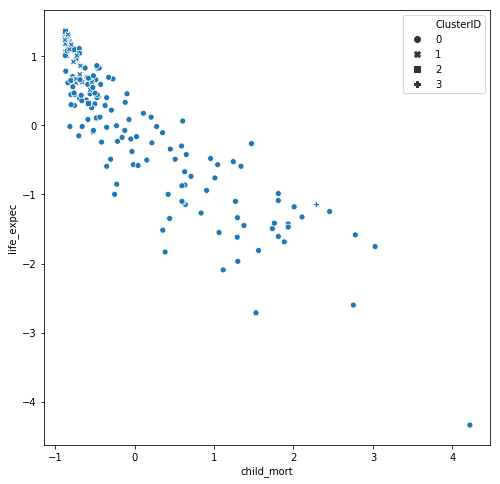

In [347]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))

sns.scatterplot(x="child_mort", y="life_expec",style="ClusterID",data=df_hc)

plt.xlabel('child_mort')
plt.ylabel('life_expec')
plt.show()

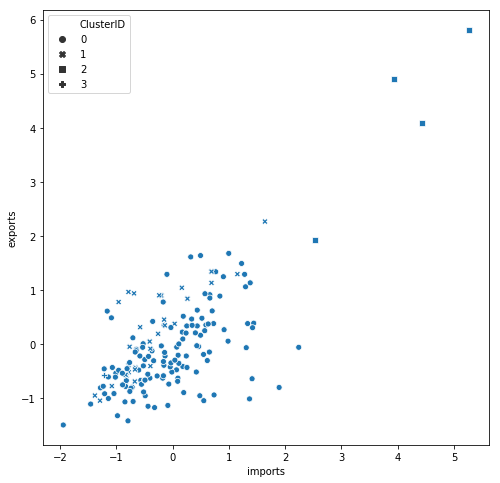

In [348]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))

sns.scatterplot(x="imports", y="exports",style="ClusterID",data=df_hc)

plt.xlabel('imports')
plt.ylabel('exports')

plt.show()

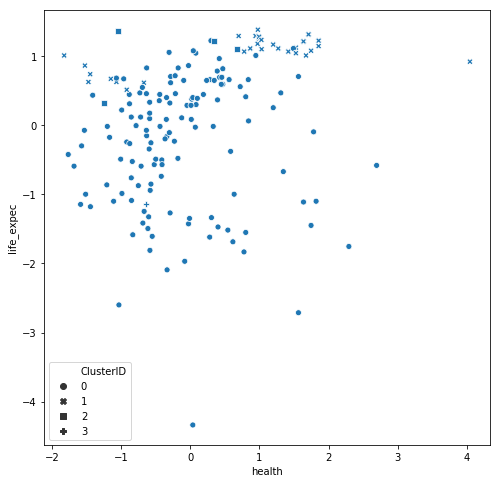

In [349]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))

sns.scatterplot(x="health", y="life_expec",style="ClusterID",data=df_hc)

plt.xlabel('health')
plt.ylabel('life_expec')
plt.show()

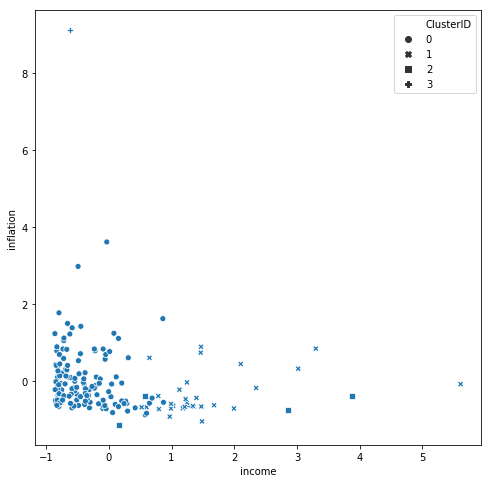

In [350]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))

sns.scatterplot(x="income", y="inflation",style="ClusterID",data=df_hc)

plt.xlabel('income')
plt.ylabel('inflation')
plt.show()

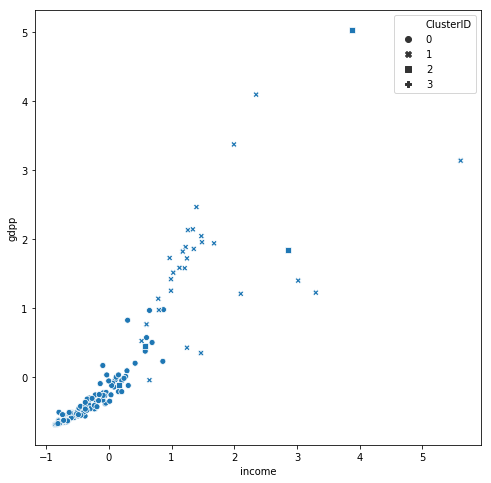

In [351]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))

sns.scatterplot(x="income", y="gdpp",style="ClusterID",data=df_hc)

plt.xlabel('income')
plt.ylabel('gdpp')

plt.show()

In [352]:
df_hc.loc[df_hc.ClusterID ==1]

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
7,Australia,1,-0.832423,-0.779697,0.699011,-1.076779,1.261966,-0.628316,1.290735,-0.674457,2.130699
8,Austria,1,-0.844858,0.372890,1.527901,0.037693,1.355617,-0.655549,1.121559,-0.999109,1.857082
11,Bahrain,1,-0.737914,1.038830,-0.673953,0.166126,1.246357,-0.032435,0.614031,-0.522070,0.423331
15,Belgium,1,-0.839884,1.291301,1.418356,1.152164,1.246357,-0.559999,1.065167,-0.720836,1.720274
23,Brunei,1,-0.690660,0.961991,-1.451722,-0.782625,3.301480,0.846206,0.738094,-0.734087,1.222291
29,Canada,1,-0.812526,-0.439409,1.637446,-0.658334,1.225546,-0.466062,1.211786,-0.873224,1.884444
44,Denmark,1,-0.849832,0.343618,1.673961,-0.136314,1.397240,-0.432852,1.008775,-0.714211,2.464511
53,Finland,1,-0.877190,-0.088145,0.779344,-0.393181,1.178720,-0.705079,1.065167,-0.714211,1.818776
54,France,1,-0.847345,-0.523567,1.856536,-0.778482,1.027838,-0.638754,1.223065,-0.608202,1.512325
58,Germany,1,-0.847345,0.043580,1.746991,-0.405610,1.209937,-0.666461,1.076446,-1.032237,1.577993


In [353]:
df_hc.loc[df_hc.ClusterID ==2]

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2,-0.882164,4.899083,0.348467,3.940415,3.878996,-0.394898,1.211786,-0.873224,5.036507
98,Malta,2,-0.782681,4.094101,0.669799,4.437577,0.580393,-0.374972,1.099002,-1.052114,0.445220
131,Seychelles,2,-0.593664,1.927969,-1.247238,2.531789,0.169369,-1.137852,0.320793,-0.515444,-0.118430
133,Singapore,2,-0.882164,5.813835,-1.042755,5.266181,2.859238,-0.742749,1.369684,-1.191250,1.840665


In [354]:
df_hc.loc[df_hc.ClusterID ==3]

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
113,Nigeria,3,2.281385,-0.578452,-0.637438,-1.221785,-0.624065,9.129718,-1.134121,1.916133,-0.581936


In [355]:
df_hc.loc[df_hc.ClusterID ==0]

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,Albania,0,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,Algeria,0,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,Angola,0,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,Antigua and Barbuda,0,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
5,Argentina,0,-0.591177,-0.812628,0.468966,-1.279787,0.080920,1.244725,0.591474,-0.382933,-0.145791
6,Armenia,0,-0.501643,-0.743107,-0.882089,-0.065883,-0.543421,-0.001123,0.309514,-0.833471,-0.533233
9,Azerbaijan,0,0.023128,0.482661,-0.341667,-1.085065,-0.059556,0.571037,-0.164178,-0.681083,-0.389857
10,Bahamas,0,-0.608587,-0.223528,0.392285,-0.132171,0.299440,-0.775674,0.365906,-0.720836,0.822811
12,Bangladesh,0,0.276809,-0.918739,-1.203420,-1.039492,-0.765062,-0.060901,-0.017559,-0.409435,-0.667961


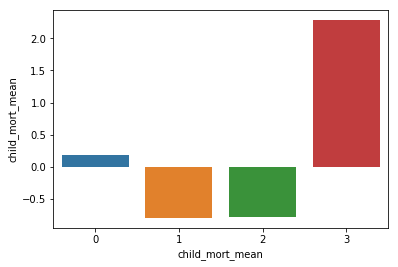

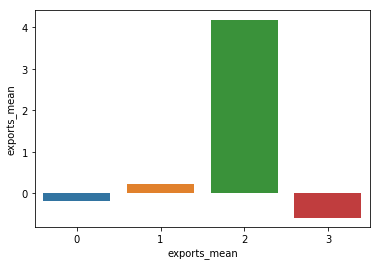

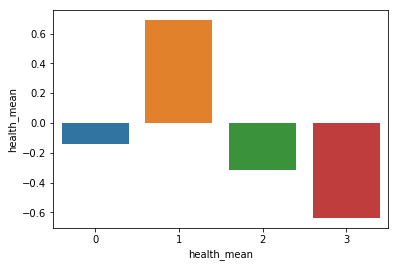

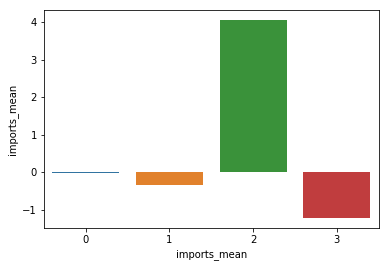

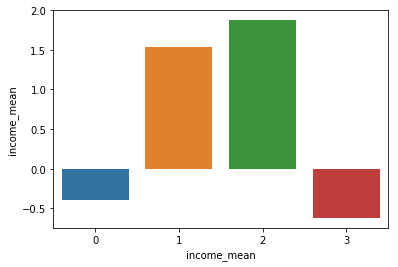

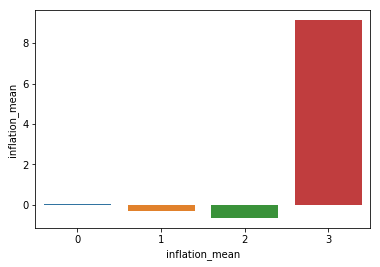

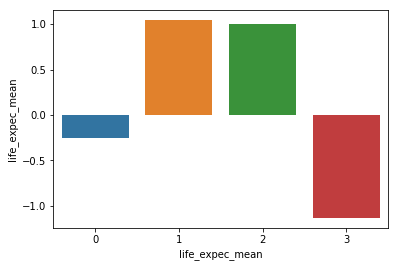

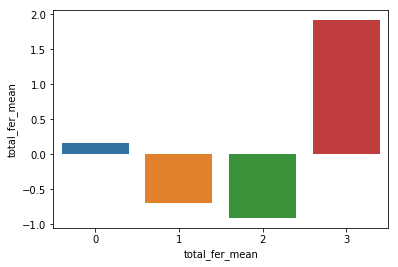

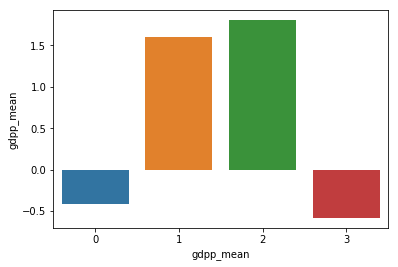

In [356]:
#combining means of all features with cluster and plotting bar plots to analyse the clusters
dfhc_cluster4 = pd.concat([pd.Series([0,1,2,3]), hc_clusters_child_mort, hc_clusters_exports, hc_clusters_health,
               hc_clusters_imports,hc_clusters_income,hc_clusters_inflation,hc_clusters_life_expec,
               hc_clusters_total_fer,hc_clusters_gdpp], axis=1)
dfhc_cluster4.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean",
             'imports_mean','income_mean','inflation_mean','life_expec_mean','total_fer_mean','gdpp_mean']
dfhc_cluster4.head()

cols=['child_mort_mean','exports_mean','health_mean','imports_mean','income_mean','inflation_mean',
      'life_expec_mean','total_fer_mean','gdpp_mean']
for col in cols:
    sns.barplot(x=dfhc_cluster4.ClusterID,y=dfhc_cluster4[col])
    plt.xlabel(col)
    plt.show()

##### The features in Cluster 3 indicates for under developed country

In [357]:
#Retriving country name related to cluster3
dfhc_cluster3=df_hc.loc[df_hc.ClusterID ==3]

In [358]:
dfhc_cluster3

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
113,Nigeria,3,2.281385,-0.578452,-0.637438,-1.221785,-0.624065,9.129718,-1.134121,1.916133,-0.581936


##### cluster 3 has only one country nigeria.  need to find other 4 countries form other clusters. 2nd least cluster is cluster 0

In [359]:
dfhc_cluster0=df_hc[(df_hc.ClusterID ==0)]

###### The parameters used for clustering have totally opposing characteristics, meaning, few of them has to be higher
###### and few of them should be lower to predict 5 least under developed countries. Thus in order to make the
###### objective to be single, the parameters that are to be lower is reciprocated to be higher by subtracting with the 
###### maximum value of that particular parameter.

In [360]:


dfhc_cluster0['Factorssum']=(dfhc_cluster0.child_mort)  +(dfhc_cluster0.inflation)+(dfhc_cluster0.total_fer)+(dfhc_cluster0.exports)+(dfhc_cluster0.health)+(dfhc_cluster0.imports)+(dfhc_cluster0.income)+(dfhc_cluster0.life_expec)+(dfhc_cluster0.gdpp)




C:\Users\VJT\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [361]:
#sorting the countries based on factorsum in descending order to find least 5 under developed countries
dfhc_cluster0.sort_values(by='Factorssum',ascending =False).head(4)

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Factorssum
49,Equatorial Guinea,0,1.808842,1.635248,-0.852877,0.497568,0.861347,1.624268,-1.089007,1.498724,0.226327,6.210439
37,"Congo, Dem. Rep.",0,1.933196,-0.000328,0.399588,0.112267,-0.860326,1.235237,-1.472473,2.379922,-0.691164,3.035918
132,Sierra Leone,0,3.027505,-0.889467,2.294716,-0.513329,-0.828536,0.893648,-1.754433,1.492098,-0.687607,3.034595
88,Liberia,0,1.269149,-0.805310,1.820021,1.893764,-0.855591,-0.219360,-1.100286,1.372838,-0.691547,2.683679


##### Nigeria,Central African Republic, Haiti, Chad, Mali,Equatorial Guinea, Congo, Dem. Rep,Sierra Leone,Liberia countries 
##### are found as under developed countries 